In [7]:
## AutoEncoder：出力データが入力データを再現する3層NN

In [8]:
import numpy as np
import chainer
from chainer import Function, gradient_check, Variable
from chainer import optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

import matplotlib.pyplot as plt

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
xtrain = iris.data.astype(np.float32)

In [10]:
## AutoEncoderモデルの定義
class MyAE(Chain):
    def __init__(self):
        super(MyAE, self).__init__(
            l1 = L.Linear(4,2),
            l2 = L.Linear(2,4),
        )
    def __call__(self, x):
        bv = self.fwd(x)
        return F.mean_squared_error(bv, x)
    def fwd(self, x):
        fv = F.sigmoid(self.l1(x))
        bv = self.l2(fv)
        return bv

In [11]:
## モデルの初期化と最適化手法の設定
model = MyAE()
optimizer = optimizers.SGD()
optimizer.setup(model)

In [12]:
## 学習開始
n = 150
bs = 30
print ("Start Learning, n={0}, bs={1}".format(n,bs))
for j in range(1000):
    sffindx = np.random.permutation(range(n))
    for i in range(0, n, bs):
        x = Variable(xtrain[sffindx[i:(i+bs) if (i+bs)<n else n]])
        model.zerograds()
        loss = model(x)
        loss.backward()
        optimizer.update()
print ("Finished Learning.")

Start Learning, n=150, bs=30
Finished Learning.


In [16]:
## 学習結果の検証
x = Variable(xtrain, volatile='on')
yt = F.sigmoid(model.l1(x))
ans = yt.data

xt = model.fwd(x)
ans2 = xt.data
inp = x.data

for i in range(n):
    print ("xt={0},\nanswer={1}".format(inp[i,:], ans2[i,:]))
    #print ("x={0}, answer={1}".format(x[i,:], ans[i,:]))

xt=[ 5.0999999   3.5         1.39999998  0.2       ], 
answer=[ 4.9125843   3.28394508  1.51912427  0.2353002 ]
xt=[ 4.9000001   3.          1.39999998  0.2       ], 
answer=[ 4.92804432  3.27772045  1.56164157  0.25414535]
xt=[ 4.69999981  3.20000005  1.29999995  0.2       ], 
answer=[ 4.91511917  3.27601004  1.54126287  0.246604  ]
xt=[ 4.5999999  3.0999999  1.5        0.2      ], 
answer=[ 4.93166876  3.27188301  1.58121216  0.26376384]
xt=[ 5.          3.5999999   1.39999998  0.2       ], 
answer=[ 4.90988827  3.282933    1.51631141  0.23450579]
xt=[ 5.4000001   3.9000001   1.70000005  0.40000001], 
answer=[ 4.92081594  3.28766918  1.52632308  0.23697312]
xt=[ 4.5999999   3.4000001   1.39999998  0.30000001], 
answer=[ 4.91828632  3.27464724  1.5501653   0.25056872]
xt=[ 5.         3.4000001  1.5        0.2      ], 
answer=[ 4.91966248  3.28151202  1.53767574  0.243433  ]
xt=[ 4.4000001   2.9000001   1.39999998  0.2       ], 
answer=[ 4.93407965  3.26607275  1.59845853  0.27245176]


Start Plot.


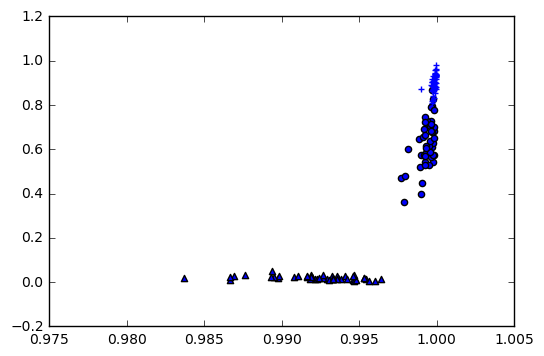

In [17]:
## 結果のプロット
x = Variable(xtrain)
yt = F.sigmoid(model.l1(x))

# クラス1=[0:50], クラス2=[50-100], クラス3=[100:150]
ans = yt.data
ansx1 = ans[0:50,0]
ansy1 = ans[0:50,1]
ansx2 = ans[50:100,0]
ansy2 = ans[50:100,1]
ansx3 = ans[100:150,0]
ansy3 = ans[100:150,1]

## プロット結果が3領域に分類されていることを確認
plt.scatter(ansx1, ansy1, marker="^")
plt.scatter(ansx2, ansy2, marker="o")
plt.scatter(ansx3, ansy3, marker="+")

print ("Start Plot.")
plt.show()